In [15]:
import csv
import pandas as pd
import numpy as np
from collections import Counter
from ultralytics import YOLO
from tqdm import tqdm

MODEL = YOLO("runs/obb/train36/weights/best.pt")
DATA_DIR = "hymenoptera-screen/images"

def _infer(img_path):
    detections = MODEL(img_path, verbose=False)
    return detections

In [16]:
df = pd.read_csv("hymenoptera-screen/in-export/all.csv", quoting=csv.QUOTE_NONE)
display(df)

,"""""",id,url,image_url,scientific_name,taxon_id,license
0,5020,25065895,https://www.inaturalist.org/observations/25065895,https://inaturalist-open-data.s3.amazonaws.com...,Neodiprion pratti pratti,49450,CC-BY-NC
1,34268,116170601,https://www.inaturalist.org/observations/11617...,https://inaturalist-open-data.s3.amazonaws.com...,Neodiprion pratti pratti,49450,CC-BY-NC
2,4728,22912608,https://www.inaturalist.org/observations/22912608,https://static.inaturalist.org/photos/35514737...,Neodiprion pratti pratti,49450,NaN
3,103130,279086800,https://www.inaturalist.org/observations/27908...,https://inaturalist-open-data.s3.amazonaws.com...,Neodiprion pratti pratti,49450,CC-BY-NC
4,33103,109671415,https://www.inaturalist.org/observations/10967...,https://inaturalist-open-data.s3.amazonaws.com...,Neodiprion pratti pratti,49450,CC-BY-NC
...,...,...,...,...,...,...,...
53933,73390,313289841,https://www.inaturalist.org/observations/31328...,https://static.inaturalist.org/photos/56574845...,Megascolia procer bimaculata,1647418,dedy supriyadi
53934,14189,61371780,https://www.inaturalist.org/observations/61371780,https://inaturalist-open-data.s3.amazonaws.com...,Megascolia procer procer,1647442,Wich’yanan (Jay) Limparungpatthanakij
53935,67943,302034716,https://www.inaturalist.org/observations/30203...,https://static.inaturalist.org/photos/54430907...,Megascolia procer procer,1647442,dedy supriyadi
53936,1490,8672293,https://www.inaturalist.org/observations/8672293,https://inaturalist-open-data.s3.amazonaws.com...,Megascolia procer procer,1647442,NaN


In [17]:
len(df['image_url'][df['image_url'].duplicated()].unique())
df = df.drop_duplicates(subset='image_url', keep='first')

In [18]:
print(f"Unique Taxa: {len(df["taxon_id"].unique())}\tObservations: {len(df)}\t -> {len(df)/len(df["taxon_id"].unique())}")

Unique Taxa: 9820	Observations: 52510	 -> 5.34725050916497


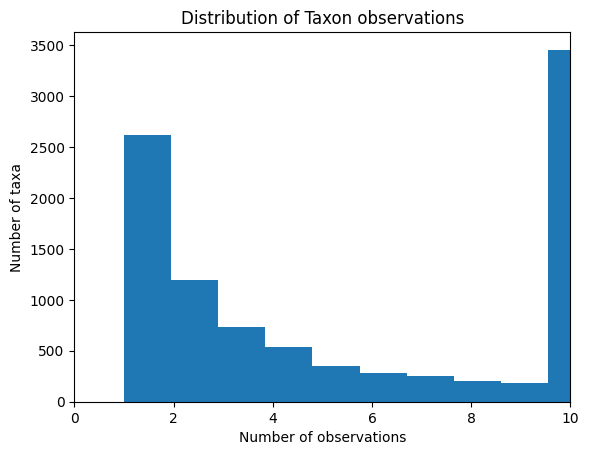

In [19]:
import matplotlib.pyplot as plt
taxon_counts = df['taxon_id'].value_counts()

plt.hist(taxon_counts, bins=20)
plt.xlabel('Number of observations')
plt.ylabel('Number of taxa')
plt.xlim([0,10])
plt.title('Distribution of Taxon observations')
plt.show()

In [20]:
results = []

inference_counter = 0

tax_ids = df["taxon_id"].unique()
for species_id in tqdm(tax_ids):
    observations = df.loc[df["taxon_id"] == species_id]
    for index, observation in observations.iterrows():
        taxon_name = observation["scientific_name"]
        try:
            result = _infer(f"{DATA_DIR}/{taxon_name}/{observation['id']}.jpg")
            inference_counter += 1
            data = {"path": f"{DATA_DIR}/{taxon_name}/{observation['id']}.jpg", "inferred": result, "species": taxon_name}
            results.append(data)
        except AttributeError:
            print(f"Skipped {DATA_DIR}/{taxon_name}/{observation['id']}.jpg")
        except FileNotFoundError:
            print(f"Skipped {DATA_DIR}/{taxon_name}/{observation['id']}.jpg because the file is missing")
        

  2%|▏         | 153/9820 [00:31<31:10,  5.17it/s]

Skipped hymenoptera-screen/images/Aneugmenus flavipes/124977654.jpg


  3%|▎         | 276/9820 [00:51<24:51,  6.40it/s]

Skipped hymenoptera-screen/images/Taxonus epicera/44205801.jpg because the file is missing


 13%|█▎        | 1309/9820 [03:25<08:35, 16.53it/s]

Skipped hymenoptera-screen/images/Euura maculosa/235395198.jpg because the file is missing


 16%|█▌        | 1542/9820 [03:40<05:51, 23.54it/s]

Skipped hymenoptera-screen/images/scientific_name/id.jpg because the file is missing


 17%|█▋        | 1653/9820 [04:01<29:51,  4.56it/s]

Skipped hymenoptera-screen/images/Auplopus/9892126.jpg


 19%|█▉        | 1892/9820 [04:38<26:24,  5.00it/s]

Skipped hymenoptera-screen/images/Myrmilloides grandiceps/92131934.jpg


 22%|██▏       | 2191/9820 [05:26<21:47,  5.84it/s]

Skipped hymenoptera-screen/images/Chrysis stilboides/36911661.jpg


 28%|██▊       | 2716/9820 [06:40<11:49, 10.01it/s]

Skipped hymenoptera-screen/images/Esagonatopus niger/93392080.jpg


 34%|███▍      | 3353/9820 [07:43<25:31,  4.22it/s]

Skipped hymenoptera-screen/images/Megarhyssa nortoni/36271252.jpg


 36%|███▋      | 3583/9820 [08:14<09:43, 10.68it/s]

Skipped hymenoptera-screen/images/Labena grallator/310349916.jpg


 38%|███▊      | 3756/9820 [08:40<13:25,  7.53it/s]

Skipped hymenoptera-screen/images/Spathius thorpei/1011607.jpg
Skipped hymenoptera-screen/images/Spathius thorpei/1011608.jpg


 55%|█████▌    | 5418/9820 [11:29<09:45,  7.52it/s]

Skipped hymenoptera-screen/images/Cryptanusia aureiscutellum/154748721.jpg


 67%|██████▋   | 6628/9820 [14:10<09:48,  5.43it/s]

Skipped hymenoptera-screen/images/Regiscolia maculata/166033683.jpg


 72%|███████▏  | 7050/9820 [15:08<05:51,  7.87it/s]

Skipped hymenoptera-screen/images/Myrmica rubra/259192277.jpg


 81%|████████  | 7909/9820 [17:23<04:15,  7.48it/s]

Skipped hymenoptera-screen/images/Myrmecia desertorum/322310678.jpg


100%|██████████| 9820/9820 [20:44<00:00,  7.89it/s]


In [21]:
fp_infer = 0
fp_counter = 0
all_confs = []
all_top_confs = []
pos_confs = []
neg_confs = []

top_pos_conf_specs = []
fp_results = []

for result in results:
    detection = result["inferred"][0]
    boxes = detection.obb.xyxyxyxy.cpu().numpy().astype(np.int32)
    confs = detection.obb.conf.cpu().numpy()
    cls_ids = detection.obb.cls.cpu().numpy().astype(int)
    labels = [detection.names[c] for c in cls_ids]
    if len(confs) > 0:
        all_confs.append([x for x in confs])
        all_top_confs.append(confs[0])
        if labels[0] in ["Andrena", "Anthidium","Apis", "Bombus", "Halictus", "Hylaeus", "Lasioglossum", "Osmia"]:
            pos_confs.append(confs[0])
        else:
            neg_confs.append(confs[0])
        if confs[0] > 0.65:
            fp_infer += 1
            if labels[0] in ["Andrena", "Anthidium","Apis", "Bombus", "Halictus", "Hylaeus", "Lasioglossum", "Osmia"]:
                fp_counter += 1
                top_pos_conf_specs.append(labels[0])
                fp_results.append({"file": result['path'], "species": result['species'], "inferred": labels[0]})

In [22]:
print(f"No detection > 0.65: {100 - round(fp_infer / inference_counter * 100,2)}%")
print(f"Any detection > 0.65: {round(fp_infer / inference_counter * 100,2)}%")
print(f"Bee detection > 0.65: {round(fp_counter / inference_counter * 100,2)}%")
print(f"Unsupported detection > 0.65: {round((fp_infer - fp_counter) / inference_counter * 100,2)}%")

No detection > 0.65: 72.18%
Any detection > 0.65: 27.82%
Bee detection > 0.65: 25.99%
Unsupported detection > 0.65: 1.83%


In [23]:
count = Counter(top_pos_conf_specs)
for class_o in count.most_common():
    print(f"{class_o[0]}: {round(class_o[1] / fp_counter * 100, 2)}%")

Lasioglossum: 75.52%
Andrena: 14.57%
Hylaeus: 4.11%
Halictus: 3.41%
Osmia: 0.89%
Anthidium: 0.84%
Apis: 0.39%
Bombus: 0.26%


In [24]:
with open("screening.tsv", "w") as f:
    f.write(f"filepath\tspecies\tinferred\n")
    for x in fp_results:
        f.write(f"{x['file']}\t{x['species']}\t{x['inferred']}\n")